In [1]:
import sys
sys.path.append("../../")
from src.config import RAW_DATA_PATH
from src.data_loader import load_raw_data

# data loading

In [2]:
df = load_raw_data(RAW_DATA_PATH)

c:\Users\user\OneDrive\Documents\Data Science\insurance-risk-modeling\notebooks\task_1\../..\src\data_loader.py:10: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


# realtion analysis

In [3]:
from src.task_1.eda.bivariate import correlation_matrix, scatter_plot, group_loss_ratio, line_plot

## correaltion of the numeric values

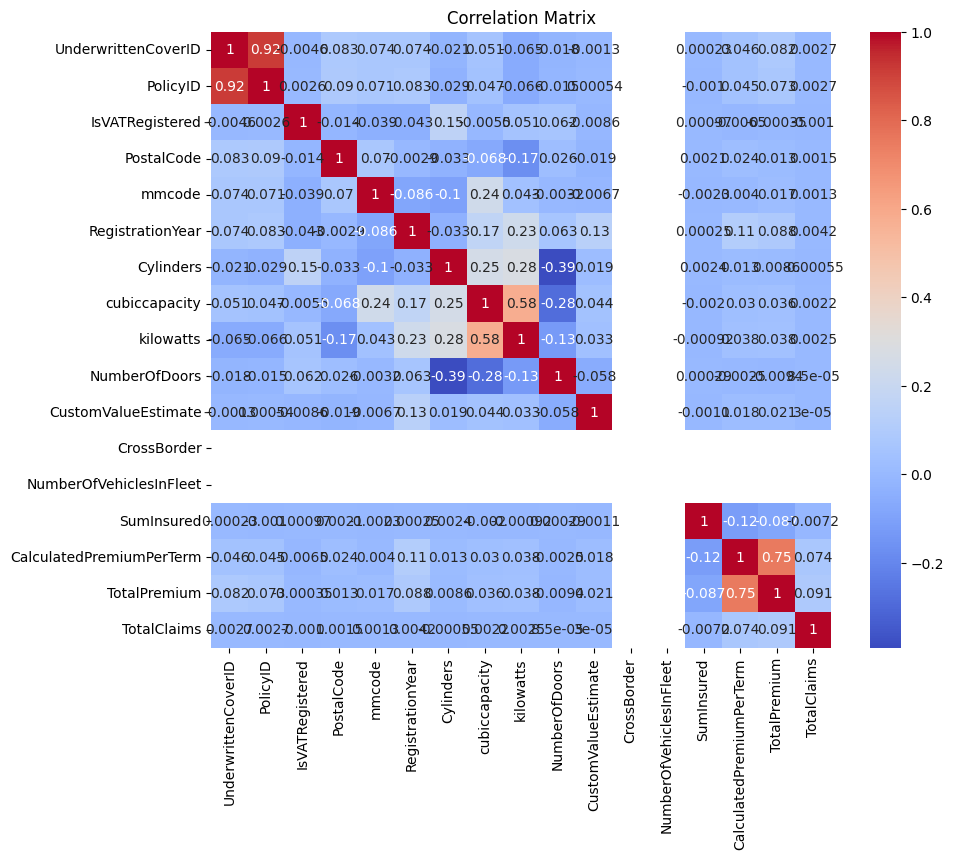

,UnderwrittenCoverID,PolicyID,IsVATRegistered,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,CrossBorder,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
UnderwrittenCoverID,1.000000,0.916800,-0.004597,0.082948,0.074009,0.074303,-0.020554,0.051171,-0.064888,-0.018099,-0.001285,NaN,NaN,0.000234,0.046289,0.081668,0.002709
PolicyID,0.916800,1.000000,0.002644,0.089967,0.070692,0.083023,-0.028595,0.046582,-0.065593,-0.014861,0.000543,NaN,NaN,-0.001003,0.044660,0.072697,0.002748
IsVATRegistered,-0.004597,0.002644,1.000000,-0.013633,-0.039047,-0.042510,0.153952,-0.005453,0.050701,0.061586,-0.008600,NaN,NaN,0.000970,-0.006537,-0.000354,-0.001022
PostalCode,0.082948,0.089967,-0.013633,1.000000,0.070489,-0.002939,-0.032869,-0.068005,-0.169376,0.025665,-0.018932,NaN,NaN,0.002097,0.023660,0.013403,0.001517
mmcode,0.074009,0.070692,-0.039047,0.070489,1.000000,-0.085965,-0.101557,0.235450,0.042599,-0.003225,-0.006684,NaN,NaN,-0.002264,0.004018,0.017204,0.001253
RegistrationYear,0.074303,0.083023,-0.042510,-0.002939,-0.085965,1.000000,-0.033394,0.165338,0.230585,0.063384,0.131656,NaN,NaN,0.000247,0.110703,0.087973,0.004237
Cylinders,-0.020554,-0.028595,0.153952,-0.032869,-0.101557,-0.033394,1.000000,0.253854,0.279458,-0.391945,0.019092,NaN,NaN,0.002370,0.013316,0.008642,-0.000546
cubiccapacity,0.051171,0.046582,-0.005453,-0.068005,0.235450,0.165338,0.253854,1.000000,0.578190,-0.284749,0.044406,NaN,NaN,-0.002009,0.030437,0.035789,0.002180
kilowatts,-0.064888,-0.065593,0.050701,-0.169376,0.042599,0.230585,0.279458,0.578190,1.000000,-0.126155,0.032689,NaN,NaN,-0.000916,0.037595,0.037915,0.002487
NumberOfDoors,-0.018099,-0.014861,0.061586,0.025665,-0.003225,0.063384,-0.391945,-0.284749,-0.126155,1.000000,-0.057510,NaN,NaN,0.000291,-0.002465,-0.009390,0.000085


In [4]:
correlation_matrix(df)

# loss ration calculation

In [5]:
from src.task_1.eda.summary_stats import calculate_loss_ratio

In [6]:
df = calculate_loss_ratio(df)

## scatter plot

### premium drivers

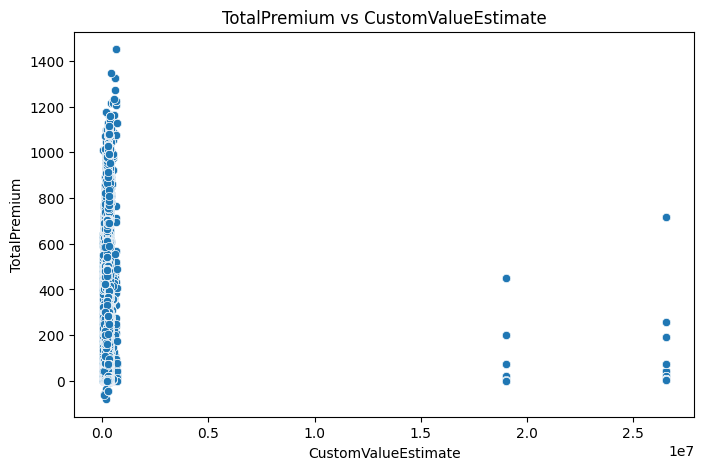

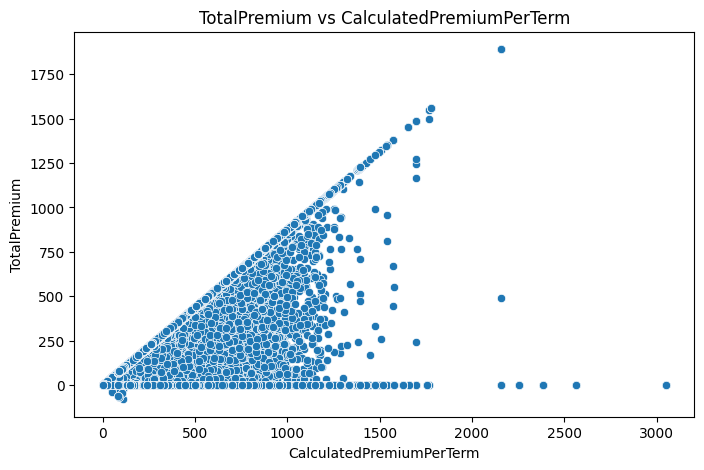

In [7]:
scatter_plot(df, 'CustomValueEstimate', 'TotalPremium')
scatter_plot(df, 'CalculatedPremiumPerTerm', 'TotalPremium')

### claim drivers

In [8]:
from src.preprocessing import clean_numeric_strings
from src.data_loader import extract_numeric_cols

In [11]:
df = clean_numeric_strings(df, extract_numeric_cols(df))
df['CapitalOutstanding'] = df['CapitalOutstanding'].str.replace(',', '', regex=False).astype(float)

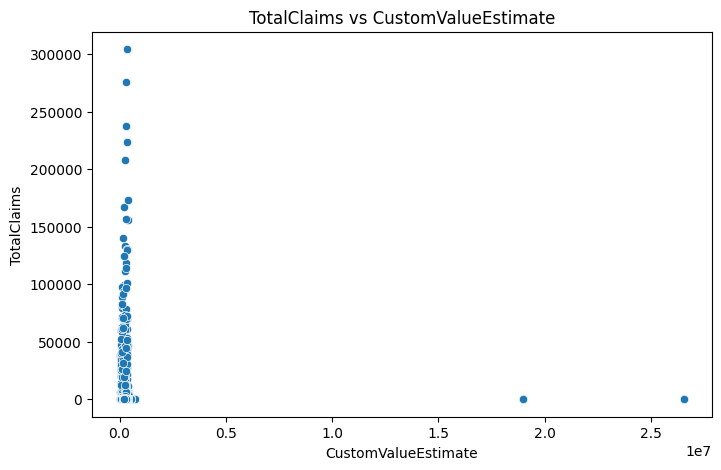

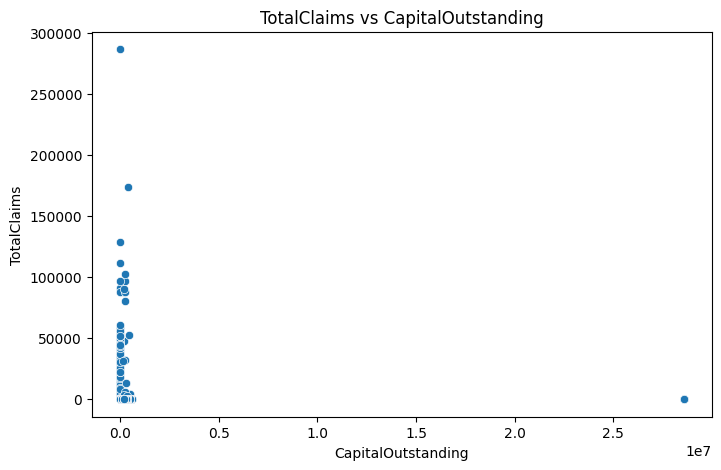

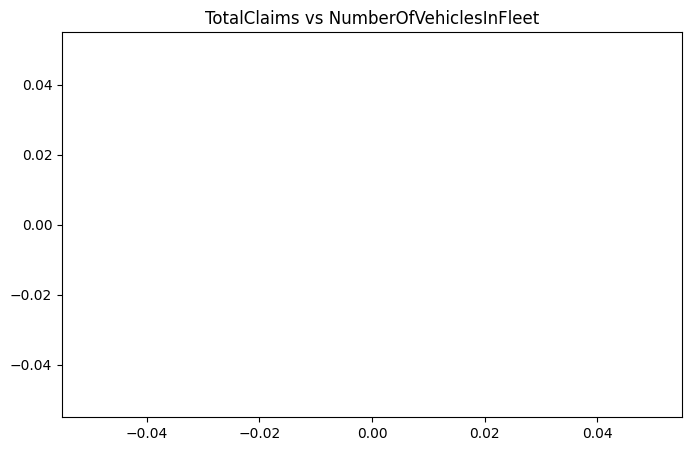

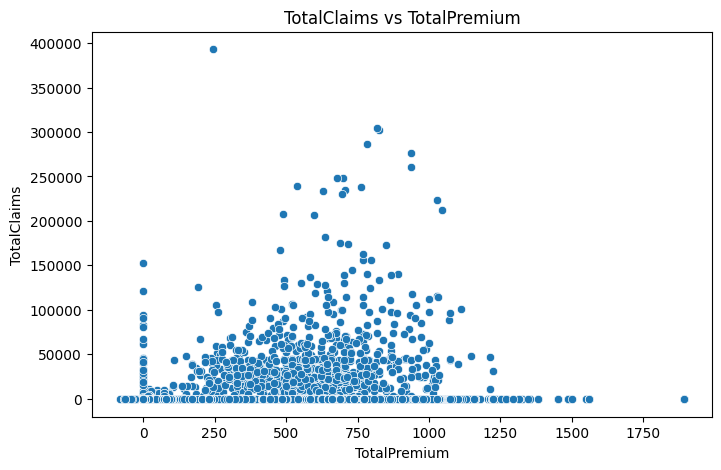

In [12]:
scatter_plot(df, 'CustomValueEstimate', 'TotalClaims')
scatter_plot(df, 'CapitalOutstanding', 'TotalClaims')
scatter_plot(df, 'NumberOfVehiclesInFleet', 'TotalClaims')
scatter_plot(df, 'TotalPremium', 'TotalClaims')

### Sum Insured as risk driver


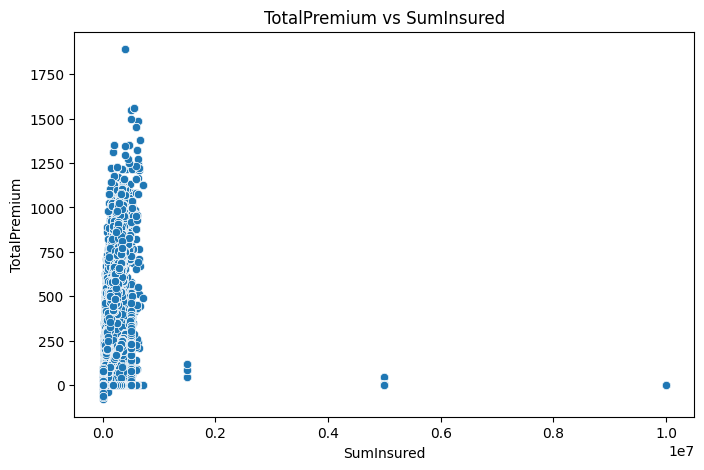

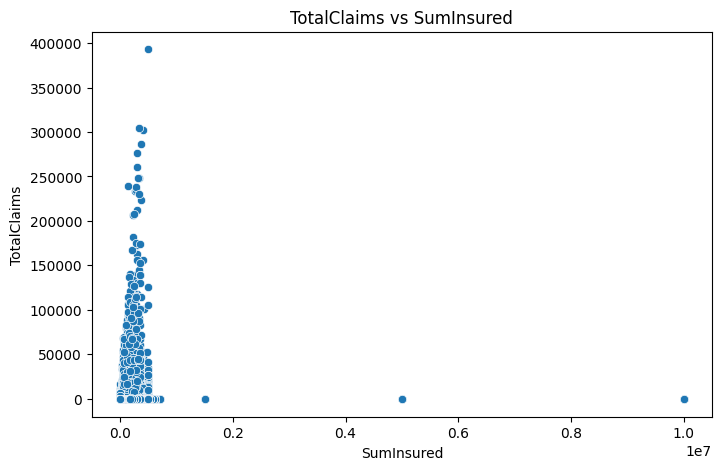

In [13]:
scatter_plot(df, 'SumInsured', 'TotalPremium')
scatter_plot(df, 'SumInsured', 'TotalClaims')

### Power-based (engine strength)

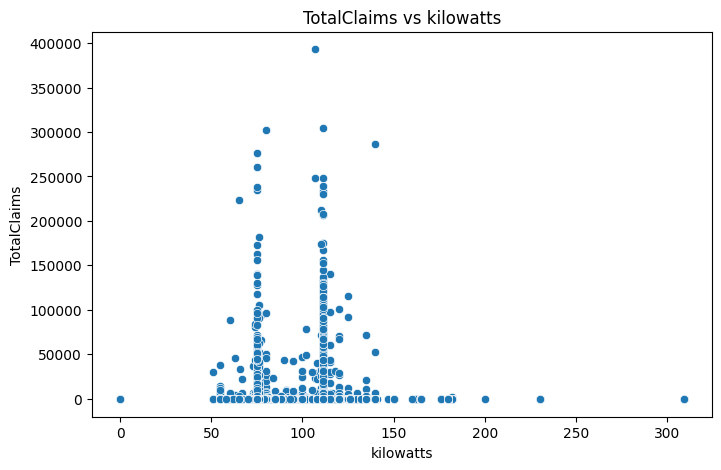

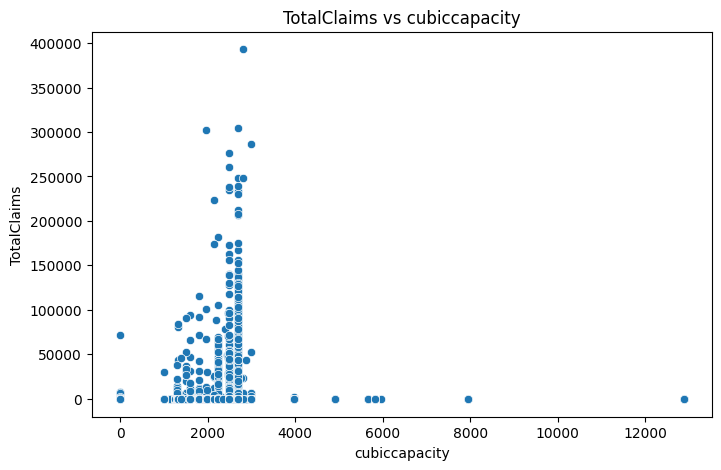

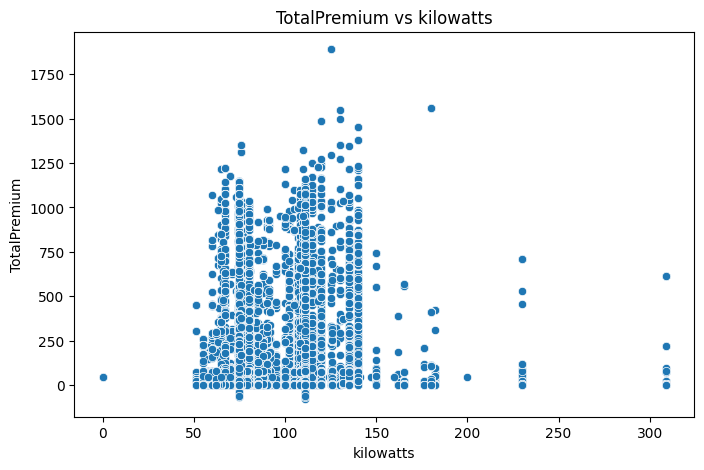

In [14]:
scatter_plot(df, 'kilowatts', 'TotalClaims')
scatter_plot(df, 'cubiccapacity', 'TotalClaims')
scatter_plot(df, 'kilowatts', 'TotalPremium')

### Risk Efficiency (Loss Ratio)

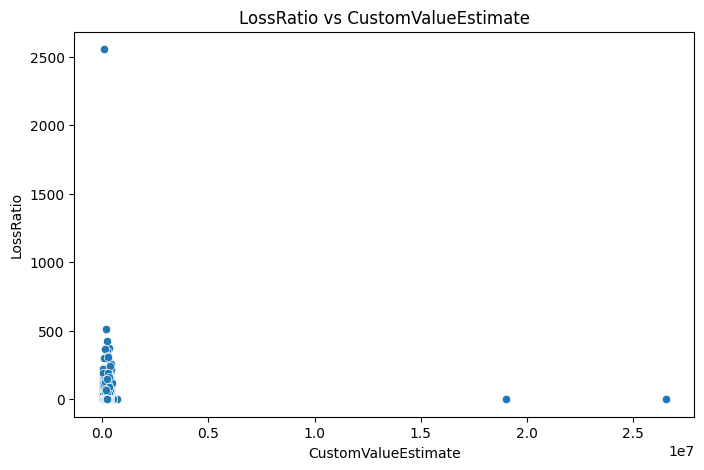

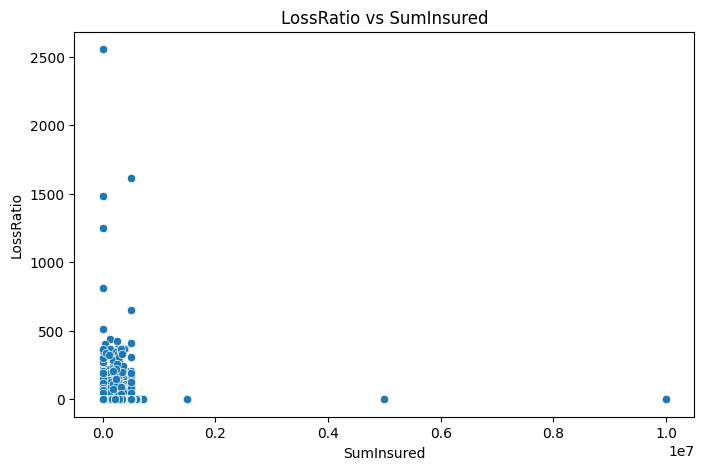

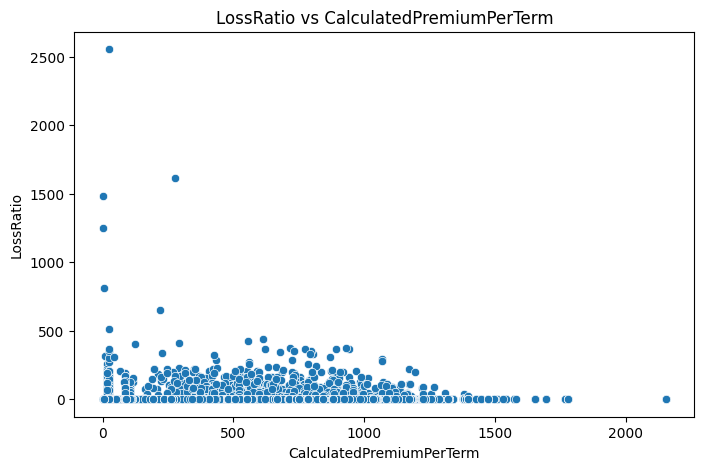

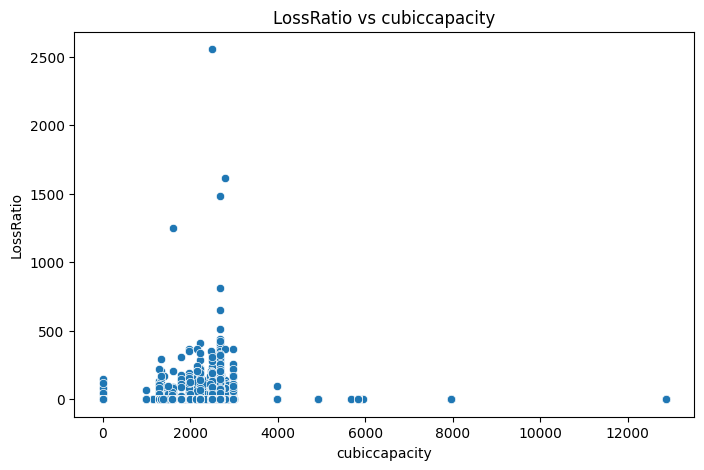

In [15]:
scatter_plot(df, 'CustomValueEstimate', 'LossRatio')
scatter_plot(df, 'SumInsured', 'LossRatio')
scatter_plot(df, 'CalculatedPremiumPerTerm', 'LossRatio')
scatter_plot(df, 'cubiccapacity', 'LossRatio')